## Building Network Models
# UB Species-collectors Network
### SCN Communites

---

In [2]:
# Setting paths
import sys,os
import pathlib
sys.path.insert(0,os.path.expanduser('~/caryocar'))
sys.path.insert(0,os.path.abspath('..'))

In [3]:
# Building the networks from data
from setupmodels import *

In [4]:
# Importing libraries for analysis
import networkx as nx
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('seaborn-paper')
sns.set_color_codes('deep')

%matplotlib inline

In [5]:
graphsdir = os.path.abspath('./graphs')

if not os.path.isdir(graphsdir):
    !mkdir graphs

### Taxonomic aggregation by genus

In [5]:
grp = dict(occs[['species','genus']].groupby('genus').apply(lambda x: set(x['species'])))

In [6]:
scn_genus = scn.taxonomicAggregation(grp)

In [7]:
print(nx.info(scn_genus))

Name: 
Type: SpeciesCollectorsNetwork
Number of nodes: 9937
Number of edges: 87632
Average degree:  17.6375


> Must fix: edges count attributes are being set to a numpy int. This is problematic for `nx.write_gexf`.

In [8]:
type(scn_genus['Abarema']['arbo,mm']['count'])

numpy.int64

In [9]:
# quickfix for the issue above
nx.set_edge_attributes(scn_genus, dict([ ((u,v),int(ct)) for u,v,ct in scn_genus.edges(data='count') ]), name='count')

In [10]:
#nx.write_gexf(scn_genus,os.path.join(graphsdir,'scn_agg_genus.gexf'))

---

### Taxonomic aggregation by family

In [6]:
grp = dict(occs[['species','family']].groupby('family').apply(lambda x: set(x['species'])))

In [7]:
scn_family = scn.taxonomicAggregation(grp)

In [8]:
nx.set_edge_attributes(scn_family, dict([ ((u,v),int(ct)) for u,v,ct in scn_family.edges(data='count') ]), name='count')

In [10]:
nx.write_gexf(scn_family,os.path.join(graphsdir,'scn_agg_family.gexf'))

In [13]:
!ls graphs

scn_agg_family.gexf


---

### Figure: Aggregation and density

Plot a figure comparing network aggregation and density

In [15]:
group = lambda x: dict(occs[['species',x]].groupby(x).apply(lambda x: set(x['species']))) 

scn_genus = scn.taxonomicAggregation(group('genus'))
scn_family = scn.taxonomicAggregation(group('family'))
scn_order = scn.taxonomicAggregation(group('order'))
scn_class = scn.taxonomicAggregation(group('class'))
scn_phylum = scn.taxonomicAggregation(group('phylum'))
scn_kingdom = scn.taxonomicAggregation(group('kingdom'))

In [16]:
density = lambda g: g.number_of_edges() / (len(g.listCollectorsNodes())*len(g.listSpeciesNodes()))

graphs = [ scn, scn_genus, scn_family, scn_order, scn_class, scn_phylum, scn_kingdom ]
n_spp, n_edges, density = zip(*[ ( len(g.listSpeciesNodes()), g.number_of_edges(), density(g) ) for g in graphs ])

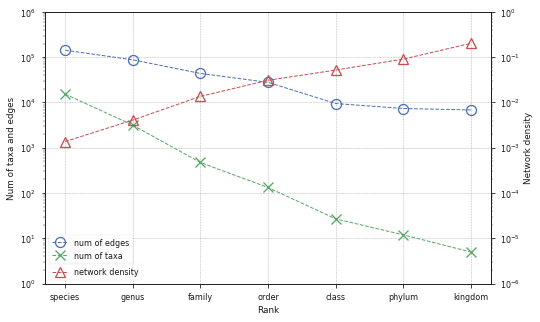

In [17]:
plt.figure(figsize=(8,5))
ax = plt.axes()
ax_r = plt.twinx(ax)

mew = 1.3
mfc = 'none'
ms=10
lw=1

classes = ['species','genus','family','order','class','phylum','kingdom']

ax.plot([ i for i,d in enumerate(classes) ],n_edges,'o', color='b',
                                                    ls='--',
                                                    markeredgewidth=mew, 
                                                    markerfacecolor=mfc,
                                                    ms=ms,
                                                    lw=lw)

ax.plot([ i for i,d in enumerate(classes) ],n_spp,'x', color='g',
                                                    ls='--',
                                                    markeredgewidth=mew, 
                                                    markerfacecolor=mfc,
                                                    ms=ms,
                                                    lw=lw)

ax_r.plot([ i for i,d in enumerate(classes) ],density,'^',color='r',
                                                    ls='--',
                                                    markeredgewidth=mew, 
                                                    markerfacecolor=mfc,
                                                    ms=ms,
                                                    lw=lw)


ax.set_yscale('log')
ax.set_ylim(1,1e6)
ax.set_xlabel('Rank')
ax.set_ylabel('Num of taxa and edges')
ax.set_xticklabels(['']+classes)

ax_r.set_yscale('log')
ax_r.set_ylim(1e-6,1)

ax_r.set_ylabel('Network density')

ax_r.legend(['network density'],loc=3)
ax.legend(['num of edges','num of taxa'],loc=3,bbox_to_anchor=(0,0.06))

ax.grid(linewidth=0.5, ls='--',color='.7')
#plt.savefig('/home/pedro/Downloads/scn_tax_agg_curves.pdf',dpi=192,format='pdf',bbox_inches='tight')

---

In [18]:
print("Num of spp nodes in the scn: {}\n\
Num of spp nodes in the scn_family: {}\n\
Num of edges in the scn: {}\n\
Num of edges in the scn_family: {}".format( 
    len(scn.listSpeciesNodes()), len(scn_family.listSpeciesNodes()),
    scn.number_of_edges(), scn_family.number_of_edges()
    )
)

Num of spp nodes in the scn: 15344
Num of spp nodes in the scn_family: 474
Num of edges in the scn: 142647
Num of edges in the scn_family: 43803


In [19]:
density = lambda g: g.number_of_edges() / (len(g.listCollectorsNodes())*len(g.listSpeciesNodes()))
density(scn_family)

0.013654165544483347

In [20]:
sorted( scn_family.listSpeciesNodes(data='count'), key=lambda x: x[1], reverse=True)

[('Fabaceae', 16005),
 ('Myrtaceae', 10951),
 ('Asteraceae', 10145),
 ('Rubiaceae', 8677),
 ('Poaceae', 5761),
 ('Cyperaceae', 5726),
 ('Melastomataceae', 5416),
 ('Malpighiaceae', 4148),
 ('Euphorbiaceae', 3448),
 ('Bignoniaceae', 3442),
 ('Desmidiaceae', 3392),
 ('Sematophyllaceae', 2360),
 ('Apocynaceae', 2121),
 ('Vochysiaceae', 2068),
 ('Malvaceae', 2060),
 ('Lamiaceae', 2051),
 ('Piperaceae', 1595),
 ('Orchidaceae', 1502),
 ('Convolvulaceae', 1371),
 ('Eunotiaceae', 1348),
 ('Solanaceae', 1345),
 ('Lythraceae', 1331),
 ('Polygalaceae', 1321),
 ('Hypnaceae', 1276),
 ('Dicranaceae', 1229),
 ('Annonaceae', 1185),
 ('Oxalidaceae', 1170),
 ('Verbenaceae', 1128),
 ('Acanthaceae', 1052),
 ('Sapindaceae', 974),
 ('Erythroxylaceae', 934),
 ('Loranthaceae', 880),
 ('Santalaceae', 876),
 ('Ochnaceae', 844),
 ('Chrysobalanaceae', 828),
 ('Eriocaulaceae', 828),
 ('Calophyllaceae', 811),
 ('Anacardiaceae', 786),
 ('Iridaceae', 721),
 ('Celastraceae', 703),
 ('Lauraceae', 700),
 ('Gentianaceae'

In [21]:
sorted( scn_family.edges('irwin,hs', data='count'), key=lambda x: x[2],reverse=True )

[('irwin,hs', 'Fabaceae', 3217),
 ('irwin,hs', 'Rubiaceae', 1211),
 ('irwin,hs', 'Asteraceae', 1178),
 ('irwin,hs', 'Poaceae', 835),
 ('irwin,hs', 'Cyperaceae', 753),
 ('irwin,hs', 'Euphorbiaceae', 729),
 ('irwin,hs', 'Melastomataceae', 642),
 ('irwin,hs', 'Malpighiaceae', 600),
 ('irwin,hs', 'Myrtaceae', 399),
 ('irwin,hs', 'Polygalaceae', 385),
 ('irwin,hs', 'Lamiaceae', 363),
 ('irwin,hs', 'Apocynaceae', 337),
 ('irwin,hs', 'Malvaceae', 335),
 ('irwin,hs', 'Bignoniaceae', 301),
 ('irwin,hs', 'Orchidaceae', 301),
 ('irwin,hs', 'Convolvulaceae', 274),
 ('irwin,hs', 'Vochysiaceae', 226),
 ('irwin,hs', 'Solanaceae', 205),
 ('irwin,hs', 'Piperaceae', 192),
 ('irwin,hs', 'Iridaceae', 183),
 ('irwin,hs', 'Anemiaceae', 173),
 ('irwin,hs', 'Gentianaceae', 165),
 ('irwin,hs', 'Verbenaceae', 159),
 ('irwin,hs', 'Apiaceae', 146),
 ('irwin,hs', 'Calophyllaceae', 134),
 ('irwin,hs', 'Lythraceae', 134),
 ('irwin,hs', 'Acanthaceae', 131),
 ('irwin,hs', 'Turneraceae', 125),
 ('irwin,hs', 'Annonaceae

In [22]:
scn_family['faria,jeq']['Myrtaceae']['count']/sum(ct for u,v,ct in scn_family.edges('faria,jeq',data='count') )

0.30961005753249521

In [23]:
scn_family['faria,jeq']['Myrtaceae']

{'count': 1453}

In [24]:
dict(scn_family.listCollectorsNodes(data='count'))['faria,jeq']

4693